In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB

from sklearn.metrics import f1_score, precision_score, recall_score, make_scorer

from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')

In [3]:
RAND_STATE = 42

In [4]:
X=data['Lyric']
y=data['Ragam']

In [5]:
count_vector = CountVectorizer()
X_counts = count_vector.fit_transform(X)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [19]:
def do_grid_search(_X,_y,mdl,params,scoring,key,n=5):
    est = GridSearchCV(mdl,params,scoring=scoring,cv=n,return_train_score=True,refit=key,n_jobs=-1,refit=True)
    est.fit(_X,_y)
    return est

SyntaxError: ignored

In [7]:
def plot_grid_results(est,keys,title):
    plt.figure(figsize=[12,3])
    for i,k in enumerate(keys):
        train_score = reduce(lambda a,b: list(a) + list(b), [est.cv_results_[f'split{x}_train_{k}'] for x in range(est.cv)])
        test_score = reduce(lambda a,b: list(a) + list(b), [est.cv_results_[f'split{x}_test_{k}'] for x in range(est.cv)])
        plt.subplot(1,len(keys),i+1)
        plt.plot(train_score)
        plt.plot(test_score)
        plt.legend(['Train','Test'])
        plt.ylim([0,1.1])
        plt.grid()
        plt.title(k)
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [8]:
counts = data['Ragam'].value_counts()
low_vals = counts[counts<10]
for i, l in enumerate(low_vals):
  data = data[data['Ragam'] != low_vals.index[i]]

In [9]:
scorers = {
    'Precision' : make_scorer(precision_score,average='micro'),
    'Recall' : make_scorer(recall_score,average='micro'),
    'F1_Score' : make_scorer(f1_score,average='micro'),
          }

In [26]:
Models = {
    'Multi Nomial Naive Bayes Classification': (MultinomialNB(),{'alpha':[1e-1,1e-3,1e-4,1e-5]}),
    'Bernoulli Naive Bayes Classification': (BernoulliNB(),{'alpha':[1e-1,1e-3,1e-4,1e-5]}),
    'Complement Naive Bayes Classification': (ComplementNB(),{'alpha':[1e-1,1e-3,1e-4,1e-5]}),
    'Logistic Regression' : (LogisticRegression(random_state=RAND_STATE),{'tol':[1e-1,1e-3,1e-4,1e-5]}),
    'Nearest Centroid Classification': (NearestCentroid(),{}),
    'Ridge Classifier': (RidgeClassifier(random_state=RAND_STATE), {'alpha':[1e-1,1e-3,1e-4,1e-5]}),
    'SGD Classifier': (SGDClassifier(random_state=RAND_STATE),{'alpha':[1e-1,1e-3,1e-4,1e-5]}),
    'Linear SVC': (LinearSVC(random_state=RAND_STATE),{'tol':[1e-2,1e-4,1e-1]}),
    'Random Forest Classifier': (RandomForestClassifier(random_state=RAND_STATE),{'min_samples_leaf':[2,5,10]}),
    'XGB Classifier': (XGBClassifier(use_label_encoder=True),{'eta':[0.1,0.3,0.5],'objective':['binary:logistic']}),
}

In [11]:
def run_nfold(n, Models):
    Res = {}
    for k in Models:
        print(f'Model {k}')
        Res[k] = do_grid_search(X_tfidf,y,Models[k][0],Models[k][1],scorers,'F1_Score',n)
        print('Best F1 Score : ' ,100*Res[k].best_score_, '%')
        plot_grid_results(Res[k],list(scorers.keys()),f'{n} Fold {k}')
    return Res

Model Multi Nomial Naive Bayes Classification


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best F1 Score :  11.517066587669927 %


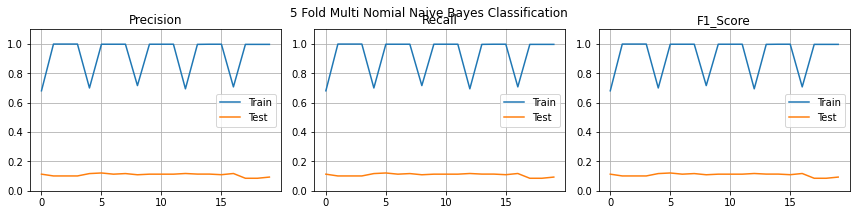

Model Bernoulli Naive Bayes Classification


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best F1 Score :  11.108258451005563 %


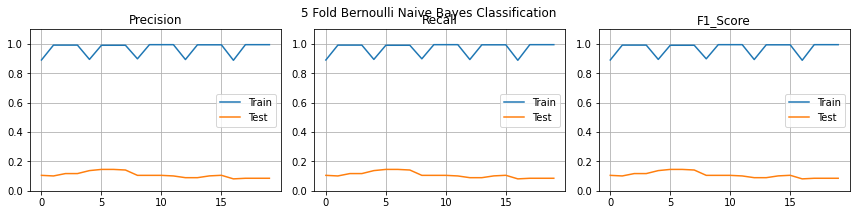

Model Complement Naive Bayes Classification


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best F1 Score :  8.351272176689378 %


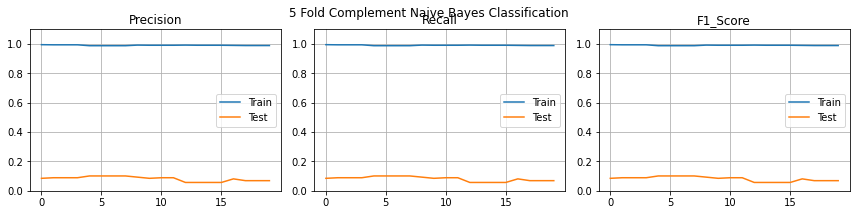

Model Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best F1 Score :  11.274151607912838 %


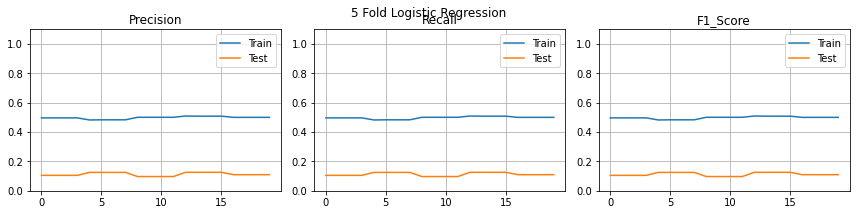

Model Nearest Centroid Classification


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best F1 Score :  10.215595273361641 %


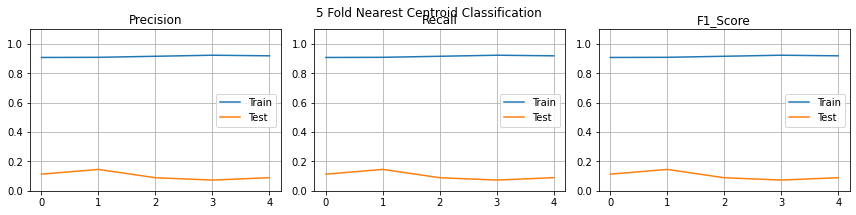

Model Ridge Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best F1 Score :  9.568151147098517 %


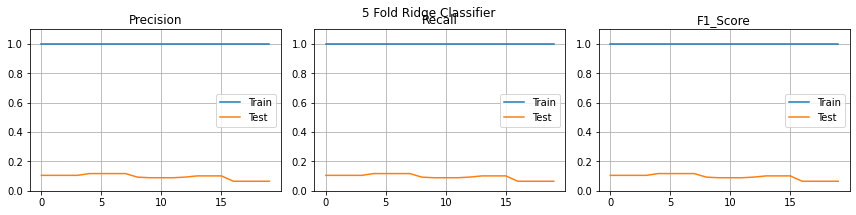

Model SGD Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best F1 Score :  10.785359270596755 %


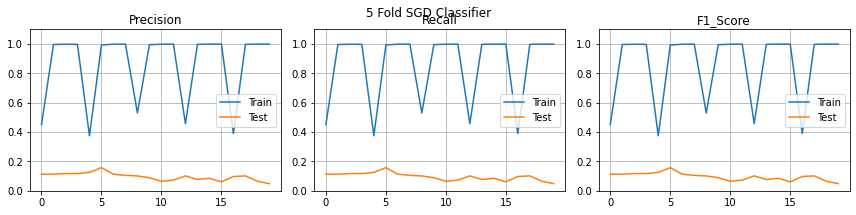

Model Linear SVC


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best F1 Score :  10.053322800434481 %


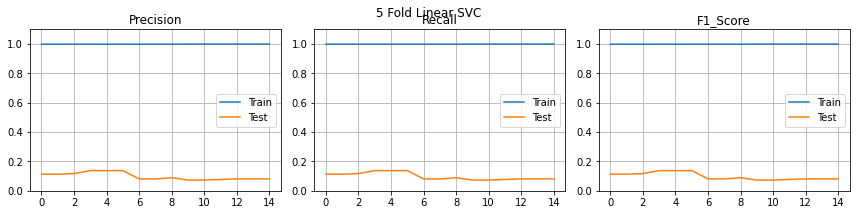

Model Random Forest Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best F1 Score :  11.835028471742207 %


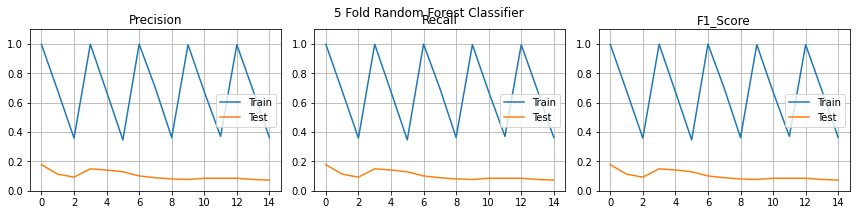

Model XGB Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best F1 Score :  9.159343010434153 %


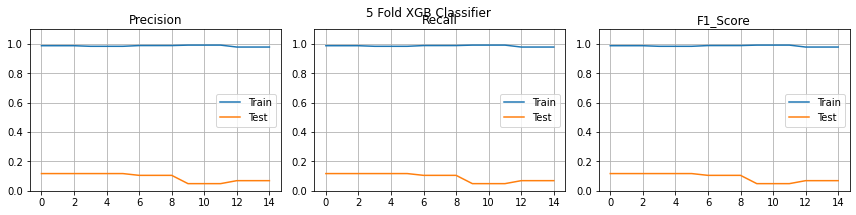

In [27]:
Results = {}
Results['5Fold'] = run_nfold(5, Models)

In [28]:
def convert_grid_search_to_df(nfold_result, name):
    res = {'Model':[],
           f'{name} Train F1 Score':[],
           f'{name} Test F1 Score':[],
           f'{name} Train Precision':[],
           f'{name} Test Precision':[],
           f'{name} Train Recall':[],
           f'{name} Test Recall':[],
           'Best Parameters':[]}
    for k in Models:
        res['Model'].append(k)
        iii = nfold_result[k].best_index_
        res[f'{name} Train F1 Score'].append(nfold_result[k].cv_results_['mean_train_F1_Score'][iii])
        res[f'{name} Test F1 Score'].append(nfold_result[k].cv_results_['mean_test_F1_Score'][iii])
        res[f'{name} Train Precision'].append(nfold_result[k].cv_results_['mean_train_Precision'][iii])
        res[f'{name} Test Precision'].append(nfold_result[k].cv_results_['mean_test_Precision'][iii])
        res[f'{name} Train Recall'].append(nfold_result[k].cv_results_['mean_train_Recall'][iii])
        res[f'{name} Test Recall'].append(nfold_result[k].cv_results_['mean_test_Recall'][iii])
        res['Best Parameters'].append(nfold_result[k].best_params_)
    df = pd.DataFrame(data=res)
    df.sort_values(by=f'{name} Test F1 Score', ascending=False, inplace=True)
    return df

In [29]:
fold_5 = convert_grid_search_to_df(Results['5Fold'], '5 Fold')

In [30]:
fold_5

,Model,5 Fold Train F1 Score,5 Fold Test F1 Score,5 Fold Train Precision,5 Fold Test Precision,5 Fold Train Recall,5 Fold Test Recall,Best Parameters
8,Random Forest Classifier,0.997770,0.118350,0.997770,0.118350,0.997770,0.118350,{'min_samples_leaf': 2}
0,Multi Nomial Naive Bayes Classification,0.700527,0.115171,0.700527,0.115171,0.700527,0.115171,{'alpha': 0.1}
3,Logistic Regression,0.498172,0.112742,0.498172,0.112742,0.498172,0.112742,{'tol': 0.1}
1,Bernoulli Naive Bayes Classification,0.994322,0.111083,0.994322,0.111083,0.994322,0.111083,{'alpha': 0.0001}
6,SGD Classifier,0.440802,0.107854,0.440802,0.107854,0.440802,0.107854,{'alpha': 0.1}
4,Nearest Centroid Classification,0.915853,0.102156,0.915853,0.102156,0.915853,0.102156,{}
7,Linear SVC,0.999391,0.100533,0.999391,0.100533,0.999391,0.100533,{'tol': 0.1}
5,Ridge Classifier,1.000000,0.095682,1.000000,0.095682,1.000000,0.095682,{'alpha': 0.001}
9,XGB Classifier,0.987227,0.091593,0.987227,0.091593,0.987227,0.091593,"{'eta': 0.1, 'objective': 'binary:logistic'}"
2,Complement Naive Bayes Classification,0.992295,0.083513,0.992295,0.083513,0.992295,0.083513,{'alpha': 0.1}
